In [21]:
import numpy as np
from deepsudoku import REPO_PATH
import os
import glob
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from pathlib import Path
import tqdm

os.chdir(REPO_PATH)

In [22]:
df = pd.read_csv("stats/rl_results.csv",index_col=0)
runs = df.run.unique()
runs

array(['Nonestop_ENV_Shared_right_rewards', 'WithSpecialSoftplus',
       'measure_time_nostop', 'Archi_ConvwithFCHead',
       'High_Win_Reward_ENV', 'Archi_SharedOnlyConv', 'Nonestop_ENV',
       'measure_time_x2', 'Archi_MLP', 'Sparse_ENV',
       'Archi_SeperateOnlyConv', 'Archi_TransformerAgent'], dtype=object)

In [23]:
df.columns

Index(['step', 'time_stamp', 'eval/avg_episodic_length',
       'eval/avg_episodic_return', 'eval/avg_winrate',
       'charts/avg_episodic_return', 'charts/avg_episodic_length',
       'losses/value_loss', 'env', 'run'],
      dtype='object')

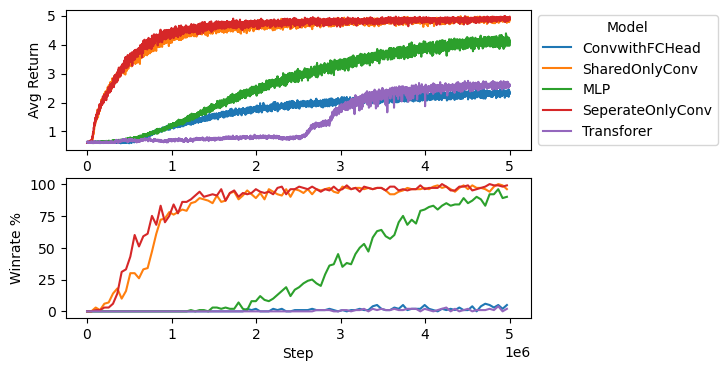

In [24]:
archi = [i for i in runs if "Archi" in i]
archi = df.query("run in @archi").copy()
archi.run.unique()
archi.run =archi.run.str.replace("Archi_","")
archi.run.unique()

archi = archi.replace({"run":{"TransformerAgent":"Transforer"}})

archi = archi.rename(columns={"step":"Step", 'eval/avg_winrate':'Winrate %',"run":"Model",'charts/avg_episodic_return':"Avg Return"})

archi["Winrate %"] *=100
fig = plt.figure(figsize=(6,4))
ax = plt.subplot(2,1,1)
sns.lineplot(archi, x = "Step", y ="Avg Return", hue = "Model", )

ax2 = plt.subplot(2,1,2, sharex = ax)

sns.lineplot(archi, x = "Step", y ="Winrate %", hue = "Model", legend = None)

ax.legend(loc='center left', bbox_to_anchor=(1,0.5), title ="Model")

# Make non-scientific xticks
plt.savefig("imgs/rl_architectures.jpg", bbox_inches='tight', dpi=300)
plt.show()

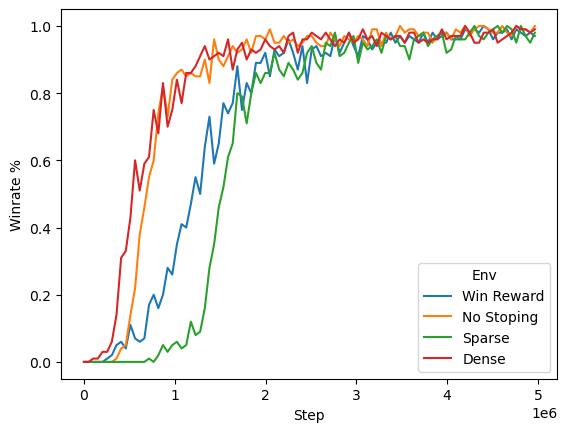

In [25]:
wanted = ['High_Win_Reward_ENV',  'Nonestop_ENV'  , 'Sparse_ENV',"Archi_SeperateOnlyConv"]
envs = df.query("run in @wanted").copy()

names = {
    'High_Win_Reward_ENV':"Win Reward",
    'Nonestop_ENV':"No Stoping",
    'Sparse_ENV':"Sparse",
    "Archi_SeperateOnlyConv": "Dense"
}

envs = envs.replace({"run":names})
envs = envs.rename(columns={"step":"Step", "eval/avg_winrate":'Winrate %',"run":"Env","eval/avg_episodic_return":"Generalized Return"})
# sns.lineplot(envs, x = "Step", y ="Generalized Return", hue = "Env")
sns.lineplot(envs, x = "Step", y ="Winrate %", hue = "Env", )
plt.savefig("imgs/rl_envs.jpg", bbox_inches='tight', dpi=300)
plt.show()

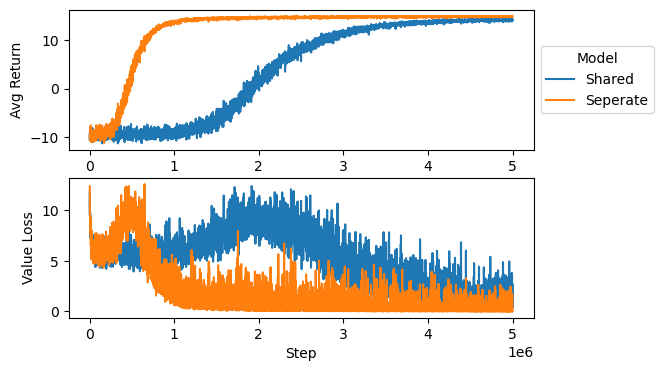

In [26]:
wanted = ['Nonestop_ENV'  , "Nonestop_ENV_Shared_right_rewards"]

sepornot = df.query("run in @wanted").copy()

names = {
    'Nonestop_ENV':"Seperate",
    "Nonestop_ENV_Shared_right_rewards": "Shared"
}

sepornot = sepornot.replace({"run":names})
sepornot = sepornot.rename(columns={"step":"Step", 'eval/avg_winrate':'Winrate %',"run":"Model",'charts/avg_episodic_return':"Avg Return",'losses/value_loss':"Value Loss"})


sepornot["Winrate %"] *=100
fig = plt.figure(figsize=(6,4))
ax = plt.subplot(2,1,1)

sns.lineplot(sepornot, x = "Step", y ="Avg Return", hue = "Model", )
ax.legend(loc='center left', bbox_to_anchor=(1,0.5), title = "Model")

ax2 = plt.subplot(2,1,2, sharex = ax)
sns.lineplot(sepornot, x = "Step", y ="Value Loss", hue = "Model", legend = None)


# Make non-scientific xticks
plt.savefig("imgs/rl_sepornot.jpg", bbox_inches='tight', dpi=300)
plt.show()

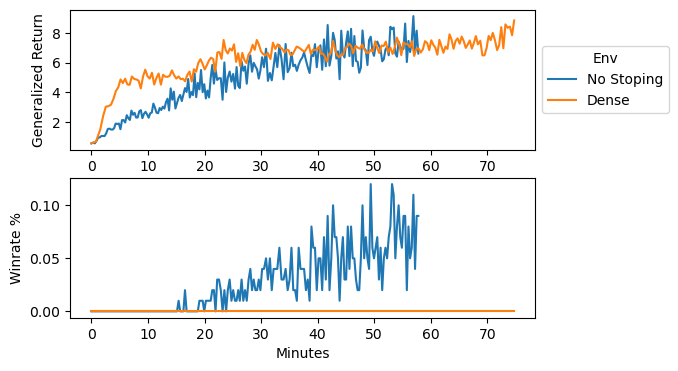

In [27]:
names = [i for i in runs if "measure" in i]

comp = df.query("run in @names")

for n in names:
    ind = comp.index[comp.run == n]
    comp.loc[ind, "time_stamp"] -= comp.loc[ind, "time_stamp"].min()

comp = comp.replace({"run":
    {"measure_time_nostop":"No Stoping",
     "measure_time_x2":"Dense"
    }})

comp = comp.rename(columns={"step":"Step", "eval/avg_winrate":'Winrate %',"run":"Env","eval/avg_episodic_return":"Generalized Return","time_stamp":"Minutes"})
comp.Minutes /= 60
comp.Minutes

fig = plt.figure(figsize=(6,4))
ax = plt.subplot(2,1,1)
sns.lineplot(comp, x = "Minutes", y ="Generalized Return", hue = "Env", )

ax2 = plt.subplot(2,1,2, sharex = ax)

sns.lineplot(comp, x = "Minutes", y ="Winrate %", hue = "Env", legend = None)

ax.legend(loc='center left', bbox_to_anchor=(1,0.5), title ="Env")

# Make non-scientific xticks
plt.savefig("imgs/rl_time_difference.jpg", bbox_inches='tight', dpi=300)
plt.show()